In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plasticnet as pn

Splikes version  0.1.0
Plasticnet version  0.1.6


# Introduction

There are two types of neurons in the full Plasticnet package. 

1. rate-based neurons (in `import plasticnet as pn`)
2. spike-based neurons (in `import splikes as sp`)

For rate-based neurons, the inputs and outputs are abstract real-numbers which may represent spiking rates or some other activity-related variable.  Also it is common, though not necessary, that time is represented in integer steps -- iterations -- rather than real-number time.  Essentially, for the simulation, this means that the time-step usually used in a rate-based simulation is $dt=1$.

To save any variables, like inputs, outputs, weights, thresholds, etc... you add a monitor to the object that has that variable and specify how often those variables are saved.  This way you don't have to save the result from every simulation step.

# Pattern-based neurons

In [38]:
pre=pn.neurons.pattern_neuron([[2,3],[5,1]])
sim=pn.simulation(50)  # run up to t=50.  with dt=1, this is 50 steps
# same as sim=simulation(50,dt=1) 

sim.monitor(pre,['output'],1)  # the "1" here is the time-step for saving.  e.g. if it is dt, then it saves every time step

# run-sim takes a simulation, a list of neurons, and a list of connections
pn.run_sim(sim,[pre],[])


Sim Time Elapsed...0.00 s


In [39]:
sim.monitors

{'output': <plasticnet.plasticnet.monitor at 0x7fdf12da9f40>}

### get the time and output saved from the simulation

In [40]:
sim.monitors['output'].arrays()  

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.]),
 array([[5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [2., 3.],
        [2., 3.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [2., 3.],
        [2., 3.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [2., 3.],
        [2., 3.],
        [5., 1.],
        [2., 3.],
        [5., 1.],
        [5., 1.],
        [5., 1.],
        [

In [41]:
t,y=sim.monitors['output'].arrays()

In [42]:
y.shape # the output is a 2d array, time x length of input pattern

(51, 2)

Text(0, 0.5, 'output')

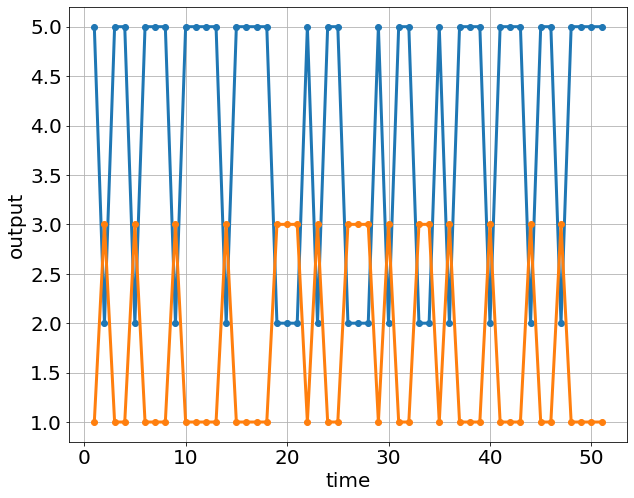

In [43]:
plot(t,y,'-o')
xlabel('time')
ylabel('output')

## Natural image inputs

Natural image inputs are a subset of the pattern-based neuron, but it just draws from patches from natural images.

In [44]:
pre=pn.neurons.natural_images('hdf5/bbsk081604_dog.hdf5',rf_size=13,verbose=False)
sim=pn.simulation(11)  # run up to t=12.  with dt=1, this is 50 steps
# same as sim=simulation(11,dt=1) 

sim.monitor(pre,['output'],1)

# run-sim takes a simulation, a list of neurons, and a list of connections
pn.run_sim(sim,[pre],[])


Sim Time Elapsed...0.09 s


In [45]:
sim.monitors['output'].arrays()

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([[ 0.10936549, -0.28992835, -0.8793621 , ..., -0.38407079,
         -0.26905933,  0.03609205],
        [ 0.85786751,  1.1198896 ,  1.34666624, ...,  1.25159628,
          1.19177176,  0.94041606],
        [-0.20784355, -0.13828017, -0.02465997, ..., -0.02929753,
         -0.04738401, -0.10859979],
        ...,
        [ 0.74795737,  0.95572001,  0.80731812, ...,  0.03052698,
          0.01336801, -0.27740694],
        [-1.9404356 , -1.56201079, -1.19332484, ..., -0.96933074,
         -1.11216756, -1.05929939],
        [-0.16146796,  0.47805143,  1.00255936, ...,  0.84766488,
          0.91769203,  1.09020922]]))

In [46]:
t,y=sim.monitors['output'].arrays()

In [47]:
y.shape  # the output is a 2d array, time x length of input pattern

(12, 169)

since the `rf_size=13` that means a 13x13 square, which is 169 numbers.  the pattern then is of length 169.  we can most easily visualize this by reshaping these long vectors back to square.

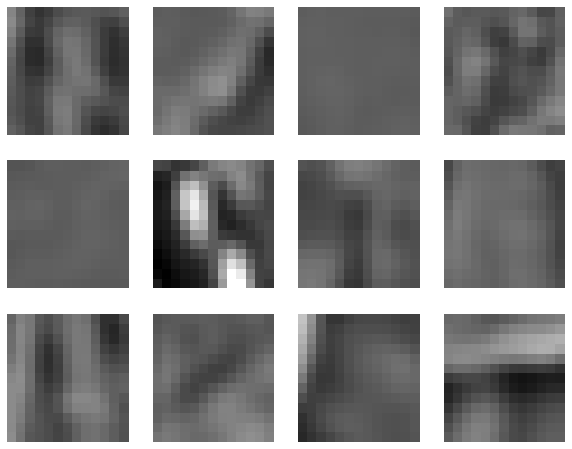

In [54]:
for i in range(12):
    vec=y[i,:]
    square=vec.reshape(13,13)
    subplot(3,4,i+1)
    grid(False)
    
    
    pcolor(square,
           vmin=y.min(),vmax=y.max(),
           cmap=cm.gray,
          )
    
    axis('off')

# Input neurons, Output neurons, and Connections

Most simulations require a network of neurons, some often thought of as "input" neurons and others as "output" neurons.  For rate-based neurons, the output neurons are often either linear or some form of sigmoidal neuron.  The input neurons are often then the pattern neurons.  There are connections between any two input-output pairs.  One can have connections between your output neurons and the same output neurons to model lateral or recurrent connnections.  You can have connections between your output neurons back to your input neurons for back-connections.  There really aren't any limits here, but most of the time the feed-forward connections are the ones I've used.  

The connections can be constant, or modifyable by a few common learning paradigms (e.g. Hebb, BCM)

## BCM

The BCM equations, with a linear neuron, are

$$
\begin{align}
y&= \mathbf{w}\cdot \mathbf{x} = w_1x_1 + w_2x_2 + w_3x_3 + \cdots w_Nx_N\\
\frac{d\mathbf{w}}{dt}&= \eta y (y-\theta) \mathbf{x} \\
\frac{d\theta}{dt} &=(y^2-\theta)/\tau
\end{align}
$$

with $dt=1$ (essentially Euler's method),then $\eta$ and $1/\tau$ serve the role of the $dt$ of making a small step in the weights and threshold, respectively.  Each iteration of the simulation, a new input (i.e. pattern) vector, $\mathbf{x}$ is chosen, the output $y$ is calculated, the changed in the weights and thresholds, $d\mathbf{w}/dt$ and $d\theta/dt$, are calculated and the weights and thresholds updated.

For BCM, in a 2D environment, the output for one pattern converges to $y\rightarrow 2$ and for the other pattern $y\rightarrow 0$.  The neuron becomes selective.

In [57]:
pre=pn.neurons.pattern_neuron([[2,3],[5,1]])
post=pn.neurons.linear_neuron(1)

c=pn.connections.BCM(pre,post,[0,.05])  # [0,0.05] is the initial weight range
c.eta=5e-5  # learning rate for BCM
c.tau=1000  # the memory constant for BCM

sim=pn.simulation(1000*100)
sim.monitor(c,['weights','theta'],100)
sim.monitor(post,['output'],100)
sim.monitor(pre,['output'],100)

pn.run_sim(sim,[pre,post],[c])

t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

Sim Time Elapsed...0.06 s


Text(0, 0.5, 'output')

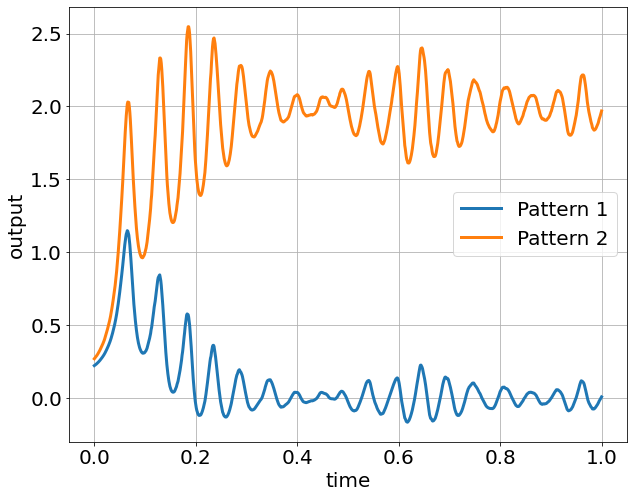

In [62]:
plot(t,outputs)
legend(['Pattern 1','Pattern 2'])
xlabel('time')
ylabel('output')

## Hebb

In [63]:
pre=pn.neurons.pattern_neuron([[2,3],[5,1]])
post=pn.neurons.linear_neuron(1)

c=pn.connections.Hebb(pre,post,[0,.05])  # [0,0.05] is the initial weight range

sim=pn.simulation(1000*100)
sim.monitor(c,['weights','theta'],100)
sim.monitor(post,['output'],100)
sim.monitor(pre,['output'],100)

pn.run_sim(sim,[pre,post],[c])

t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

Sim Time Elapsed...0.08 s


Text(0, 0.5, 'output')

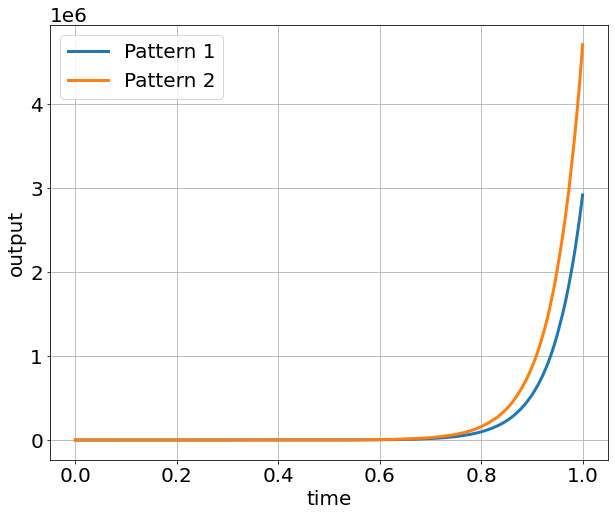

In [64]:
plot(t,outputs)
legend(['Pattern 1','Pattern 2'])
xlabel('time')
ylabel('output')

Oops!  Hebbian learning is unstable!  The typical way of stabilizing Hebbian learning is to normalize the weight vector.  We can do this by adding a post-processing step to the connections, so that after each iteration, the weights get normalized.  

In [65]:
pre=pn.neurons.pattern_neuron([[2,3],[5,1]])
post=pn.neurons.linear_neuron(1)

c=pn.connections.Hebb(pre,post,[0,.05])  # [0,0.05] is the initial weight range
c+=pn.connections.process.normalization()



sim=pn.simulation(1000*100)
sim.monitor(c,['weights','theta'],100)
sim.monitor(post,['output'],100)
sim.monitor(pre,['output'],100)

pn.run_sim(sim,[pre,post],[c])

t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

Sim Time Elapsed...0.07 s


Text(0, 0.5, 'output')

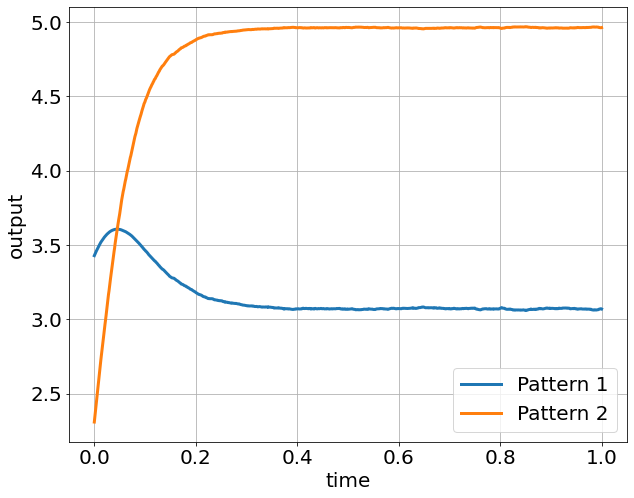

In [66]:
plot(t,outputs)
legend(['Pattern 1','Pattern 2'])
xlabel('time')
ylabel('output')

There are post-processing functions for both neurons and for connections.  Some common ones are:

- Connections
    - weight_decay
    - weight_limits
    - zero_diagonal (for lateral connections)
    - normalization
    - orthogonalization
- Neurons
    - add_noise_normal
    - add_noise_uniform
    - min_max
    - sigmoid
    - log_transform

## Natural Image simulations

The BCM neuron requires a non-linear output neuron to develop receptive fields in a natural image environment.  This can be an asymmetric sigmoid, or just having a lower-bound on the outputs  This is done with a post-process step on the linear output neurons.  Other than that, the process for this simulation is exactly the same as the ones above.

Sim Time Elapsed...2.26 s


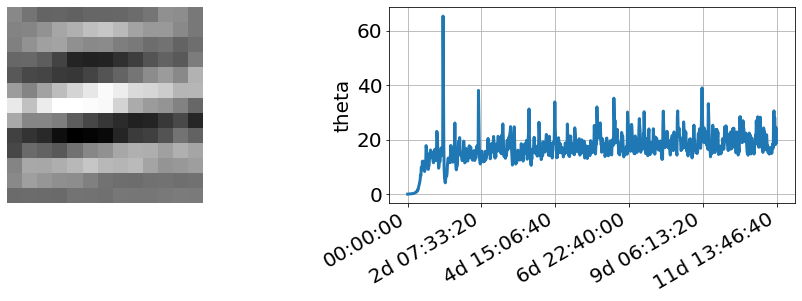

In [68]:
pre=pn.neurons.natural_images('hdf5/bbsk081604_dog.hdf5',rf_size=13,verbose=False)
post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c])

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

we can do multiple neurons as well.

Sim Time Elapsed...3.06 s


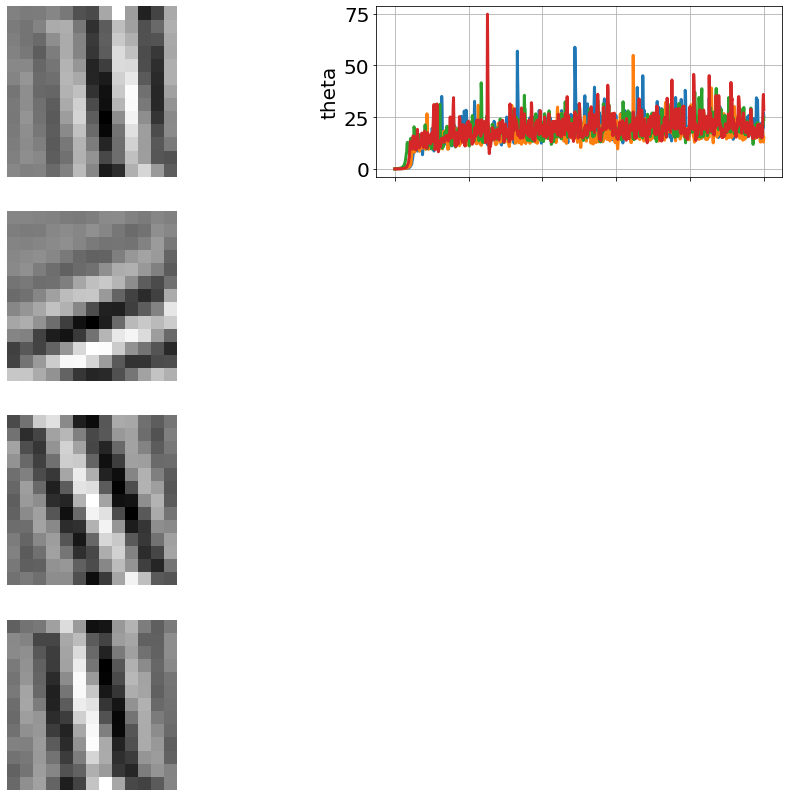

In [69]:
pre=pn.neurons.natural_images('hdf5/bbsk081604_dog.hdf5',rf_size=13,verbose=False)
post=pn.neurons.linear_neuron(4)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c])

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);